# Project 2 - Classification

<h5 style="font-size: 1.3em;color: #69956e;"> Predict customers likely to respond to a marketing campaign</h5>
<p>This notebook uses the <em>campaign.xlsx</em> dataset.</p>

<strong>Machine Learning for Marketing 2023/2024</strong>

<strong>Professors:</strong>
- Nuno António
- Ana Edmundo
- Hugo Silva
- Vasco Jesus

<strong>Projet developed by:</strong>
- Anabela Florência, r20201584
- António Cadaixa, r20201505
- Constança Rodrigues, r20201586
- Joana Pimenta, r20201590
- Laura Freitas, 20230172
<br>

<h5 style="font-size: 1.3em; color: #69956e;">Work Description</h5>

<p style="color: #000000;"> This document aims to further explore the needs of the Marketing Department of a retail company for predicting which customers are likely to respond to a marketing campaing based on information from a previous campaign. A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses.</p>

# Initializations and Data Loading

In [1]:
# Load packages
import os
import random
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from scipy.stats import pointbiserialr
from datetime import datetime
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats.mstats import winsorize
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, FunctionTransformer, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, classification_report, precision_recall_curve
#import tensorflow as tf
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Dropout
#from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE
import collections 
import category_encoders as ce
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

warnings.filterwarnings('ignore')

# To plot in notebook
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
# Load the dataset 
ds = pd.read_excel('campaign_prepared.xlsx') 

# Data Understanding

In [3]:
# Display the top 10 rows - provides an overview of the varibles and facilitates data understanding
ds.head(10)

,ID,Education,Marital_Status,NumDealsPurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,...,MntGoldProds_log,Age,MntFood_log,Total_Children,Total_Campaigns,Engagement_Score,AOV,R_score,RFM_Score,RFM_Label
0,0,Graduation,Married,1,0,0,0,0,0,0,...,4.007333,39,18.735464,0,0,0.285714,1.660202,2,10,Big Spenders
1,1,Graduation,Single,1,0,0,0,0,1,0,...,3.637586,63,8.738735,0,1,1.142857,1.028798,5,12,Recent Customers
2,9,Master,Single,4,0,0,0,0,0,0,...,3.610918,49,5.411646,2,0,1.714286,1.189364,1,5,At Risk
3,13,PhD,Widow,2,0,0,0,0,0,0,...,2.197225,77,3.871201,1,0,1.142857,1.510693,3,5,Other
4,17,PhD,Married,4,0,0,0,0,0,0,...,4.343805,53,14.904153,1,0,1.285714,0.952085,1,10,Frequent Customers
5,20,2n Cycle,Married,1,0,0,0,0,0,0,...,4.127134,59,11.916789,1,0,0.714286,2.478514,1,6,Other
6,22,Graduation,Divorced,2,0,0,0,0,0,0,...,2.708050,48,10.151597,1,0,1.428571,1.291814,1,7,Other
7,24,Master,Together,5,0,0,0,0,0,0,...,1.945910,64,5.886104,2,0,1.714286,0.898038,1,5,Other
8,25,Graduation,Married,2,0,0,0,0,0,0,...,5.036953,66,15.722201,1,0,0.857143,1.280598,5,13,Loyal Customers
9,35,Graduation,Married,3,0,0,0,0,0,0,...,4.454347,37,10.265697,1,0,1.428571,1.821655,4,9,Emerging Customers


In [4]:
# More detailed information about the DataFrame and the variables
# Helps understanding the existing types of data and the amount of non-null entries of each variable

def basic_info(ds):
    print("This dataset has ", ds.shape[1], " columns and ", ds.shape[0], " rows.")
    print("This dataset has ", ds[ds.duplicated()].shape[0], " duplicated rows.")
    print(" ")
    print("Information about this dataset: ")
    print(" ")
    print(ds.info())
basic_info(ds)

This dataset has  22  columns and  2230  rows.
This dataset has  0  duplicated rows.
 
Information about this dataset: 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2230 non-null   int64  
 1   Education          2230 non-null   object 
 2   Marital_Status     2230 non-null   object 
 3   NumDealsPurchases  2230 non-null   int64  
 4   AcceptedCmp3       2230 non-null   int64  
 5   AcceptedCmp4       2230 non-null   int64  
 6   AcceptedCmp5       2230 non-null   int64  
 7   AcceptedCmp1       2230 non-null   int64  
 8   AcceptedCmp2       2230 non-null   int64  
 9   Complain           2230 non-null   int64  
 10  Response           2230 non-null   int64  
 11  MntWines_log       2230 non-null   float64
 12  MntGoldProds_log   2230 non-null   float64
 13  Age                2230 non-null   int64  
 14

### Conclusion
- The dataset has 44 columns and 2230 observations, without any null values

## Summary Statistics Analysis

In [5]:
# Summary statistics for all variables to better understand them and check if there's any inconsistencies 
ds.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,2230.0,NaN,NaN,NaN,5585.102242,3241.680707,0.0,2826.75,5453.5,8417.5,11191.0
Education,2230,5,Graduation,1122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2230,5,Married,866,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumDealsPurchases,2230.0,NaN,NaN,NaN,2.220628,1.537836,0.0,1.0,2.0,3.0,6.0
AcceptedCmp3,2230.0,NaN,NaN,NaN,0.073094,0.260349,0.0,0.0,0.0,0.0,1.0
AcceptedCmp4,2230.0,NaN,NaN,NaN,0.074888,0.263269,0.0,0.0,0.0,0.0,1.0
AcceptedCmp5,2230.0,NaN,NaN,NaN,0.072646,0.259612,0.0,0.0,0.0,0.0,1.0
AcceptedCmp1,2230.0,NaN,NaN,NaN,0.064574,0.245828,0.0,0.0,0.0,0.0,1.0
AcceptedCmp2,2230.0,NaN,NaN,NaN,0.013453,0.11523,0.0,0.0,0.0,0.0,1.0
Complain,2230.0,NaN,NaN,NaN,0.008969,0.094298,0.0,0.0,0.0,0.0,1.0


In [6]:
# Create a copy of the original dataset to ensure that all subsequent changes are made on the duplicated dataset
X = ds.copy(deep=True)

In [7]:
# Set the color palette
my_palette = sns.diverging_palette(20, 220, n=200)
color1 = my_palette[199]
color2 = my_palette[150]
color3 = my_palette[100]
color4 = my_palette[50]
color5 = my_palette[1]
campaign_colors = [color1, color2, color3, color4, color5]

# Data Preparation

## Feature Enconding

In [8]:
# Label encoding assigns a unique integer to each category in categorical variables ('Education', 'Marital_Status' and 'RFM_Label'
# It's more compact than one-hot encoding because it doesn't create additional columns, and that's why we chose to use it

# Initialize the label encoder
le = LabelEncoder()

# Apply label encoding to 'Education'
X['Education'] = le.fit_transform(X['Education'])

# Apply label encoding to 'Marital_Status'
X['Marital_Status'] = le.fit_transform(X['Marital_Status'])

# Apply label encoding to 'RFM_Label'
X['RFM_Label'] = le.fit_transform(X['RFM_Label'])

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2230 non-null   int64  
 1   Education          2230 non-null   int32  
 2   Marital_Status     2230 non-null   int32  
 3   NumDealsPurchases  2230 non-null   int64  
 4   AcceptedCmp3       2230 non-null   int64  
 5   AcceptedCmp4       2230 non-null   int64  
 6   AcceptedCmp5       2230 non-null   int64  
 7   AcceptedCmp1       2230 non-null   int64  
 8   AcceptedCmp2       2230 non-null   int64  
 9   Complain           2230 non-null   int64  
 10  Response           2230 non-null   int64  
 11  MntWines_log       2230 non-null   float64
 12  MntGoldProds_log   2230 non-null   float64
 13  Age                2230 non-null   int64  
 14  MntFood_log        2230 non-null   float64
 15  Total_Children     2230 non-null   int64  
 16  Total_Campaigns    2230 

## Feature Scaling

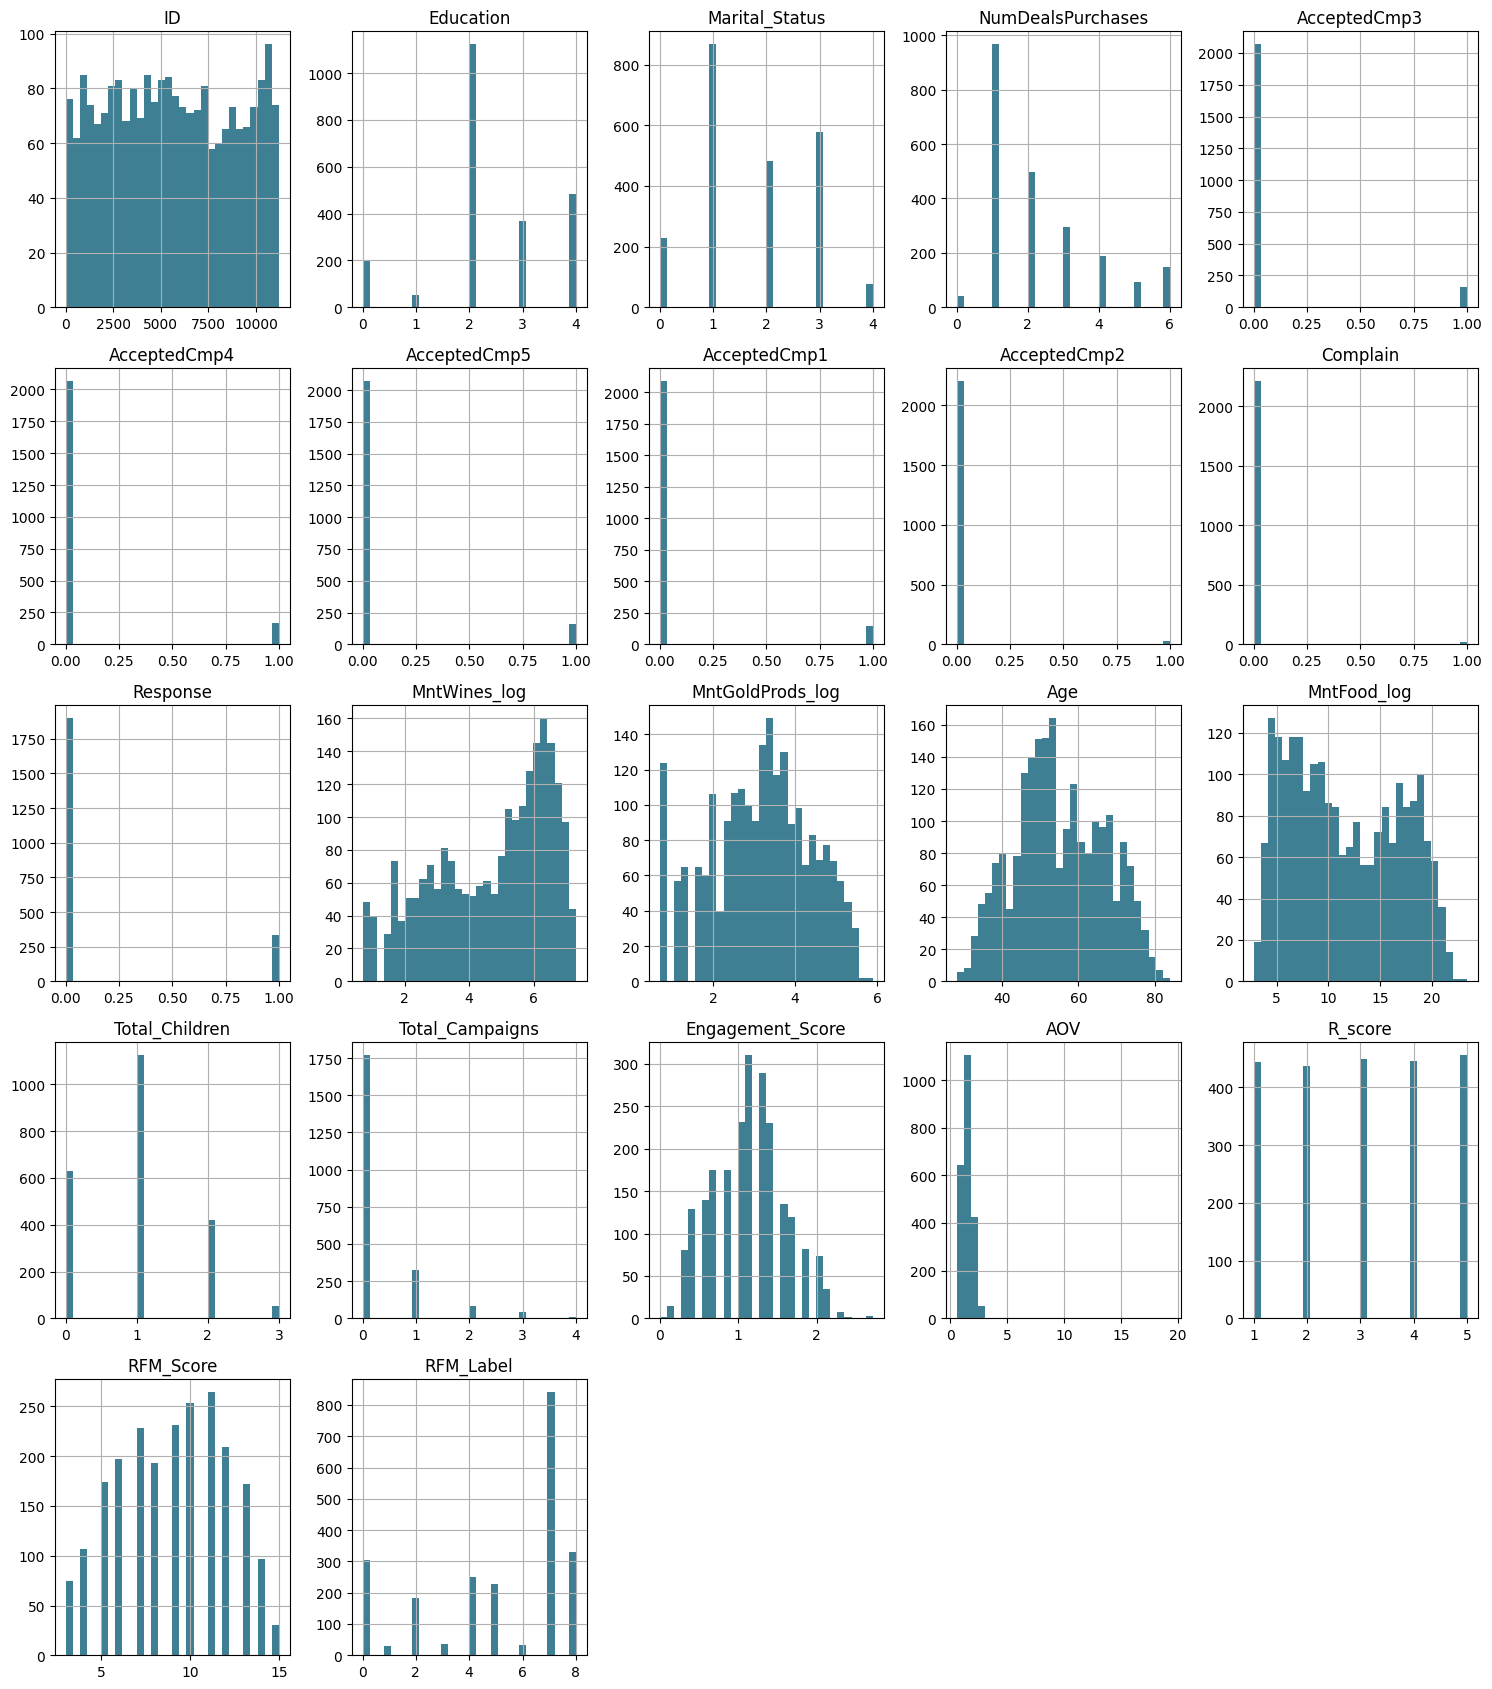

In [10]:
# Plot the distribution of each variable

X.hist(figsize=(15, 17), bins=30, color=color1)
plt.tight_layout()
plt.show()

In [11]:
# Normal Distribution -> Features that are approximately normally distributed can be scaled using StandardScaler
# Skewed Distribution -> For features that are heavily skewed, a Log Transformation can be applied before scaling, or MinMaxScaler can be used to normalize the values to a specific range
# Binary Features -> Features that are binary do not require scaling
# Multimodal Distribution -> Features with multiple peaks might benefit from trobust scaling techniques

# Define lists for StandardScaler and MinMaxScaler based on visual inspection
standard_scaling_features = ['NumDealsPurchases', 'MntWines_log', 'MntGoldProds_log', 'MntFood_log']
minmax_scaling_features = ['Education', 'Marital_Status', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Total_Children', 'Total_Campaigns', 'Engagement_Score', 'AOV', 'R_score', 'RFM_Score', 'RFM_Label']

In [12]:
# Apply Standard Scaling

scaler_standard = StandardScaler()
X = X.copy()
X[standard_scaling_features] = scaler_standard.fit_transform(X[standard_scaling_features])

In [13]:
# Apply MinMax Scaling

scaler_minmax = MinMaxScaler()
X[minmax_scaling_features] = scaler_minmax.fit_transform(X[minmax_scaling_features])

In [14]:
X.head()

,ID,Education,Marital_Status,NumDealsPurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,...,MntGoldProds_log,Age,MntFood_log,Total_Children,Total_Campaigns,Engagement_Score,AOV,R_score,RFM_Score,RFM_Label
0,0,0.50,0.25,-0.793909,0.0,0.0,0.0,0.0,0.0,0.0,...,0.688513,0.196429,1.379447,0.000000,0.00,0.105263,0.058889,0.25,0.583333,0.250
1,1,0.50,0.50,-0.793909,0.0,0.0,0.0,0.0,1.0,0.0,...,0.386373,0.625000,-0.534509,0.000000,0.25,0.421053,0.025179,1.00,0.750000,1.000
2,9,0.75,0.50,1.157322,0.0,0.0,0.0,0.0,0.0,0.0,...,0.364581,0.375000,-1.171508,0.666667,0.00,0.631579,0.033752,0.00,0.166667,0.000
3,13,1.00,1.00,-0.143499,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.790620,0.875000,-1.466439,0.333333,0.00,0.421053,0.050907,0.50,0.166667,0.875
4,17,1.00,0.25,1.157322,0.0,0.0,0.0,0.0,0.0,0.0,...,0.963461,0.446429,0.645911,0.333333,0.00,0.473684,0.021084,0.00,0.583333,0.500


In [15]:
X.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ID,2230.0,5.585102e+03,3241.680707,0.000000,2826.750000,5453.500000,8417.500000,11191.000000
Education,2230.0,5.991031e-01,0.280676,0.000000,0.500000,0.500000,0.750000,1.000000
Marital_Status,2230.0,4.338565e-01,0.265180,0.000000,0.250000,0.500000,0.750000,1.000000
NumDealsPurchases,2230.0,1.011647e-16,1.000224,-1.444319,-0.793909,-0.143499,0.506912,2.458142
AcceptedCmp3,2230.0,7.309417e-02,0.260349,0.000000,0.000000,0.000000,0.000000,1.000000
AcceptedCmp4,2230.0,7.488789e-02,0.263269,0.000000,0.000000,0.000000,0.000000,1.000000
AcceptedCmp5,2230.0,7.264574e-02,0.259612,0.000000,0.000000,0.000000,0.000000,1.000000
AcceptedCmp1,2230.0,6.457399e-02,0.245828,0.000000,0.000000,0.000000,0.000000,1.000000
AcceptedCmp2,2230.0,1.345291e-02,0.115230,0.000000,0.000000,0.000000,0.000000,1.000000
Complain,2230.0,8.968610e-03,0.094298,0.000000,0.000000,0.000000,0.000000,1.000000


In [16]:
# Standard and MinMax Scaling methods have been applied appropriately to the respective features
# Note: It's fine to have negative values as this is a result of centering the data around the mean and scaling to unit variance

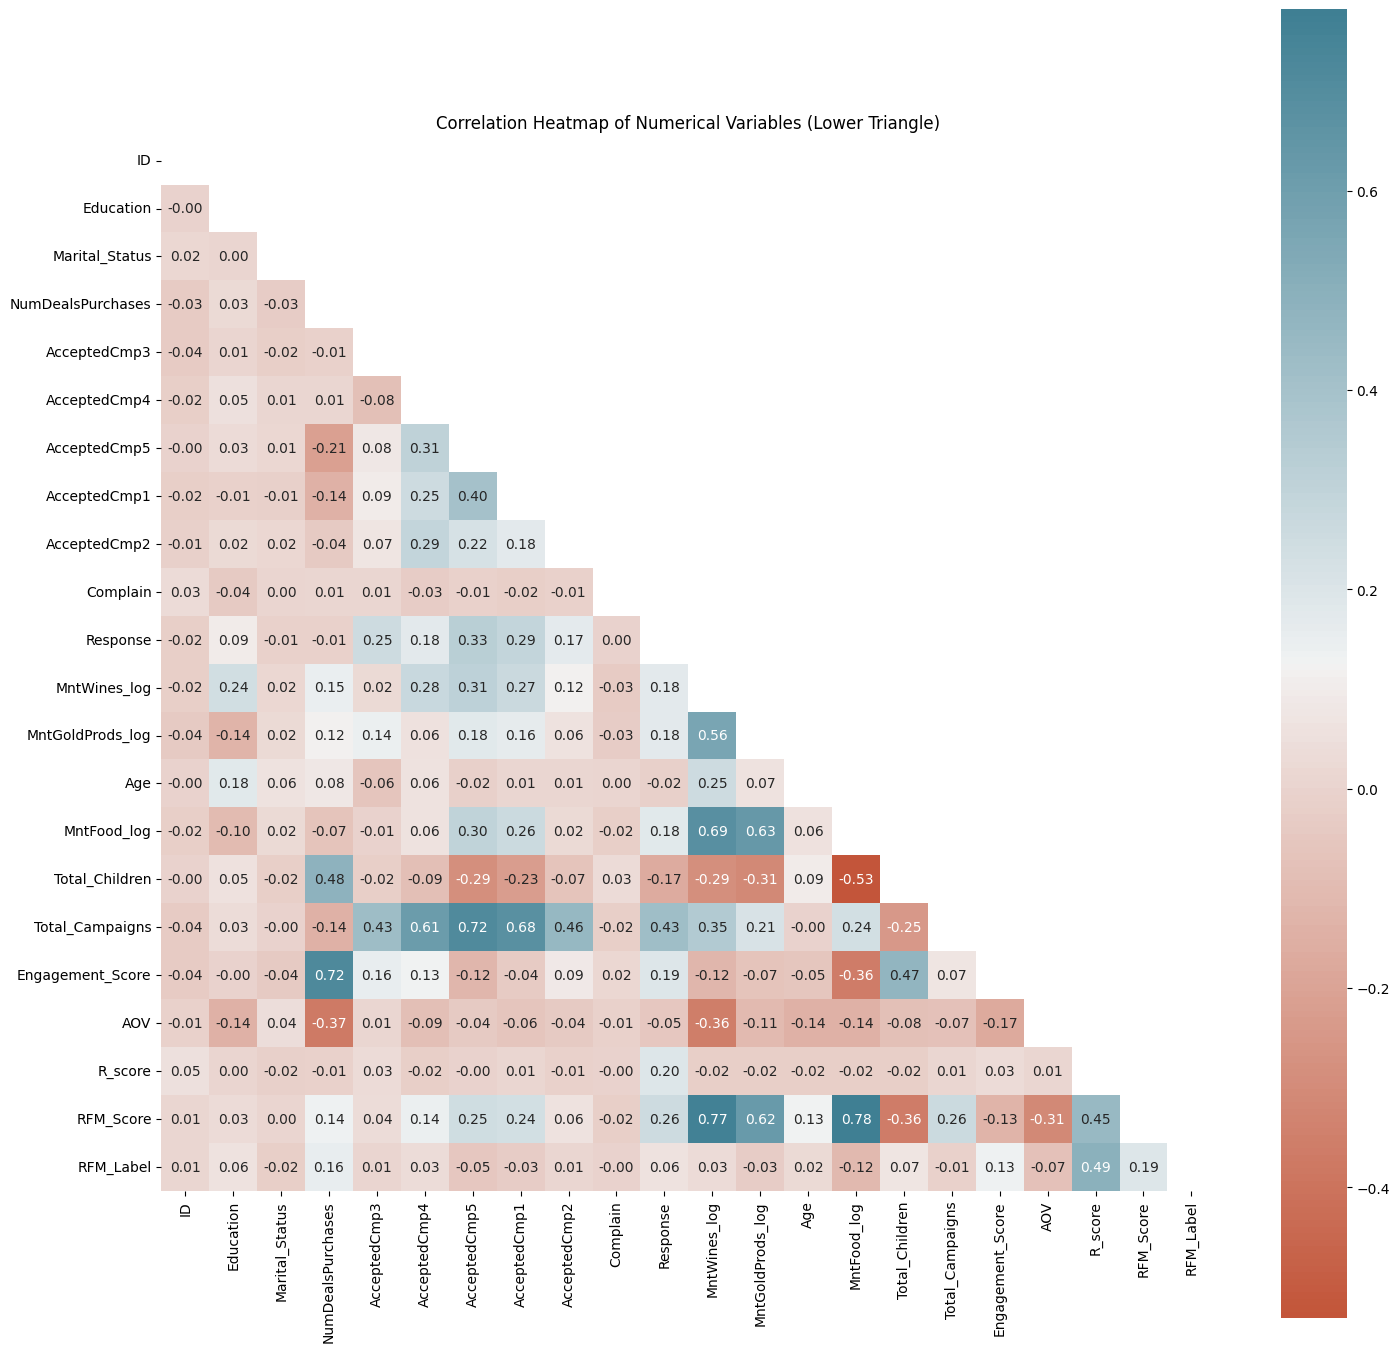

In [17]:
# Visualize the correlation matrix as a heatmap to easily identify relationships between numerical variables

# Select only the numerical columns
numerical_X = X.select_dtypes(include=['float64', 'int64', 'int32'])

# Compute the correlation matrix
corr_matrix = numerical_X.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

my_palette = sns.diverging_palette(20, 220, n=200)

# Create a heatmap
plt.figure(figsize=(17, 17))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap=my_palette, fmt=".2f", cbar=True, square=True)
plt.title('Correlation Heatmap of Numerical Variables (Lower Triangle)')
plt.show()

## Feature Selection

In [18]:
# Create the target
y = X['Response']

In [19]:
X = X.drop(columns=['Response'])
X = X.drop(columns=['ID'])

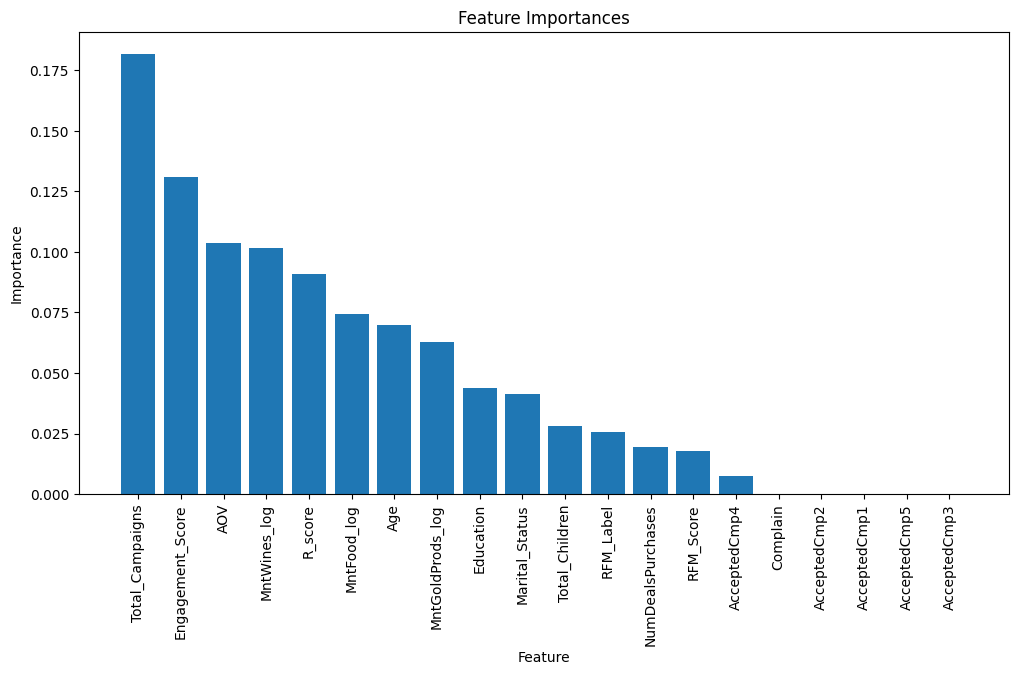

In [20]:
# Feature Selection using Decision Tree

dt = DecisionTreeClassifier()
dt.fit(X, y)

# Get feature importances
importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

# Review Feature Importances: Identify the top features based on their importance scores.
# Refine the Feature Set: Optionally, you can refine the feature set by selecting a subset of the most important features.

In [21]:
#Removing the variables with less importance
X = X.drop(columns=['AcceptedCmp2'])
X = X.drop(columns=['AcceptedCmp1'])
X = X.drop(columns=['Complain'])

#After some iterations we concluded that this the combination that would lead us to less overfitting while maintaining good performance.

# Modeling

## Neural Network

In [22]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=123)

Counter({0.0: 1422, 1.0: 250})


<Axes: xlabel='y', ylabel='count'>

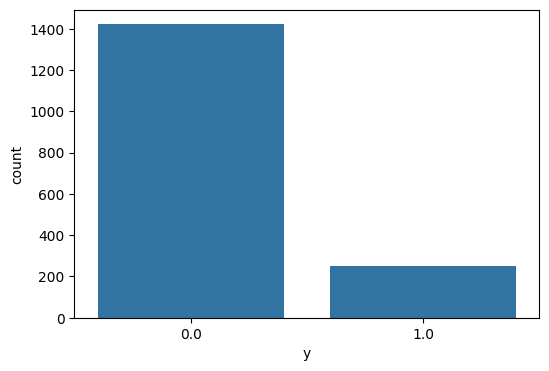

In [23]:
# Display target balance in the training dataset
print(collections.Counter(y_train))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="y", data=pd.DataFrame(data={'y':y_train}), ax=ax)

Counter({0.0: 1422, 1.0: 1422})


<Axes: xlabel='y', ylabel='count'>

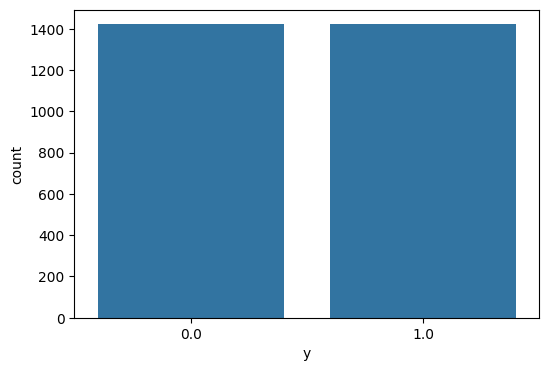

In [24]:
# Applyting SMOTE to generate new instances (oversampling)
sm = SMOTE(random_state=123, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)

# Display target balance in the training dataset
print(collections.Counter(y_train))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="y", data=pd.DataFrame(data={'y':y_train}), ax=ax)

#### Model training

In [25]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Define a MLPClassifier with dropout and early stopping, based on overfitting from previous iterations
classModel = MLPClassifier(solver='adam', alpha=0.01, hidden_layer_sizes=(50, 50, 50), random_state=123, max_iter=500)
classModel.fit(X_train_scaled, y_train)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(50, 50, 50), max_iter=500,
              random_state=123)

In [27]:
# Evaluation function
def evaluate_model(y_test, y_pred, y_pred_proba):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'AUC-ROC: {auc_roc:.4f}')
    return accuracy, precision, recall, f1, auc_roc

In [28]:
# Create object and train the model
classModel = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=123, max_iter=500)
classModel.fit(X_train_scaled, y_train)

# Make predictions & Evaluate the model
y_pred_train_proba = classModel.predict_proba(X_train_scaled)[:, 1]
y_pred_test_proba = classModel.predict_proba(X_test_scaled)[:, 1]
y_pred_train = (y_pred_train_proba >= 0.5).astype(int)
y_pred_test = (y_pred_test_proba >= 0.5).astype(int)

# Evaluate the MLPClassifier model
print("MLPClassifier Model Performance:")
accuracy, precision, recall, f1, auc_roc = evaluate_model(y_test, y_pred_test, y_pred_test_proba)

MLPClassifier Model Performance:
Accuracy: 0.8280
Precision: 0.4539
Recall: 0.7711
F1 Score: 0.5714
AUC-ROC: 0.8841


In [29]:
# Hyperparameter tuning using RandomizedSearchCV
# param_dist = {
#     'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
#     'activation': ['tanh', 'relu'],
#     'solver': ['adam', 'sgd'],
#     'alpha': uniform(0.001, 0.1),
#     'learning_rate': ['constant', 'adaptive'],
#     'max_iter': randint(200, 500)
# }

# mlp = MLPClassifier(random_state=123)
# random_search = RandomizedSearchCV(estimator=mlp, param_distributions=param_dist, n_iter=10, n_jobs=-1, cv=3, random_state=42)
# random_search_result = random_search.fit(X_train_scaled, y_train)

# print(f"Best Score: {random_search_result.best_score_}")
# print(f"Best Params: {random_search_result.best_params_}")

# Best model from RandomizedSearchCV
# best_mlp_model = random_search_result.best_estimator_

#After some iterations we decided to erase the tuning because we were having a lot of overfitting (ACCURACY of Train: 0.992968; ACCURACY of Test: 0.879928)

In [30]:
# Create base models for ensembling
rf = RandomForestClassifier(n_estimators=100, random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)
knn = KNeighborsClassifier()

# Create the voting classifier with the best MLP model and other base models
ensemble_model = VotingClassifier(estimators=[('mlp', classModel), ('rf', rf), ('lr', lr), ('knn', knn)], voting='soft')

# Fit the ensemble model
ensemble_model.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('mlp',
                              MLPClassifier(alpha=1e-05,
                                            hidden_layer_sizes=(5, 2),
                                            max_iter=500, random_state=123,
                                            solver='lbfgs')),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42)),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

In [31]:
# Make predictions
y_pred_train = ensemble_model.predict(X_train_scaled)
y_pred_proba_train = ensemble_model.predict_proba(X_train_scaled)[:, 1]
y_pred_test = ensemble_model.predict(X_test_scaled)
y_pred_proba_test = ensemble_model.predict_proba(X_test_scaled)[:, 1]

In [32]:
# Evaluate the ensemble model
print("Ensemble Model Performance:")
accuracy, precision, recall, f1, auc_roc = evaluate_model(y_test, y_pred_test, y_pred_proba_test)

Ensemble Model Performance:
Accuracy: 0.8638
Precision: 0.5294
Recall: 0.7590
F1 Score: 0.6238
AUC-ROC: 0.9112


In [33]:
# Function to plot confusion matrix - Adapted from https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    ax = sns.heatmap(cf,annot=box_labels, fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

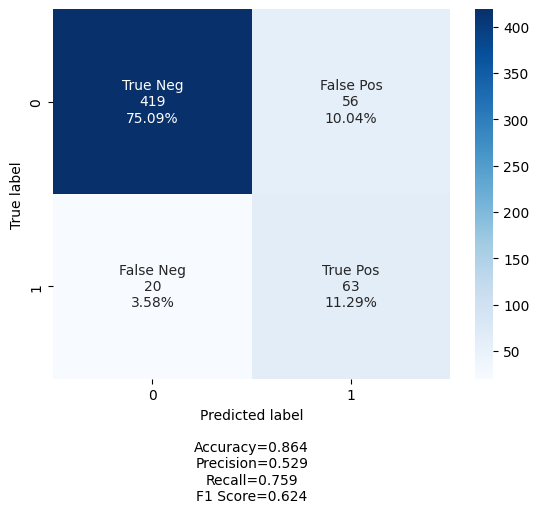

In [34]:
# Show the confusion matrix
cf = confusion_matrix(y_test, y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

- **High True Negative Rate:** The model is quite effective at correctly identifying instances where the condition is not present. This is evidenced by the high number of true negatives (419), which accounts for 75.09% of the total predictions.

- **Moderate True Positive Rate:** The model correctly identifies a portion of the instances where the condition is present, as shown by the true positives (63), which make up 11.29% of the total predictions. However, there is room for improvement.

- **False Positives and Negatives:** There are a notable number of false positives (56), where the model incorrectly predicted the condition's presence, and some false negatives (20), where the model missed predicting the condition. These errors indicate that the model has some misclassifications in both directions.

Overall, while the model demonstrates strong performance in correctly identifying true negatives, it has moderate performance in identifying true positives and has room for improvement in reducing false positives and false negatives.

In [35]:
# Print the values of TP, TN, FP, FN
tn, fp, fn, tp = cf.ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 419
False Positives: 56
False Negatives: 20
True Positives: 63


In [36]:
# Define a function to create a dataframe with metrics
def performanceMetricsDF(metricsObj, y_train, y_pred_train, y_test, y_pred_test):
    measures_list = ['ACCURACY', 'PRECISION', 'RECALL', 'F1 SCORE', 'AUC']
    train_results = [metricsObj.accuracy_score(y_train, y_pred_train),
                     metricsObj.precision_score(y_train, y_pred_train),
                     metricsObj.recall_score(y_train, y_pred_train),
                     metricsObj.f1_score(y_train, y_pred_train),
                     metricsObj.roc_auc_score(y_train, y_pred_train)]
    test_results = [metricsObj.accuracy_score(y_test, y_pred_test),
                    metricsObj.precision_score(y_test, y_pred_test),
                    metricsObj.recall_score(y_test, y_pred_test),
                    metricsObj.f1_score(y_test, y_pred_test),
                    metricsObj.roc_auc_score(y_test, y_pred_test)]
    resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test': test_results})
    return resultsDF

resultsDF_lr = performanceMetricsDF(metrics, y_train, y_pred_train, y_test, y_pred_test)
print(resultsDF_lr)

     Measure     Train      Test
0   ACCURACY  0.967300  0.863799
1  PRECISION  0.940358  0.529412
2     RECALL  0.997890  0.759036
3   F1 SCORE  0.968270  0.623762
4        AUC  0.967300  0.820571


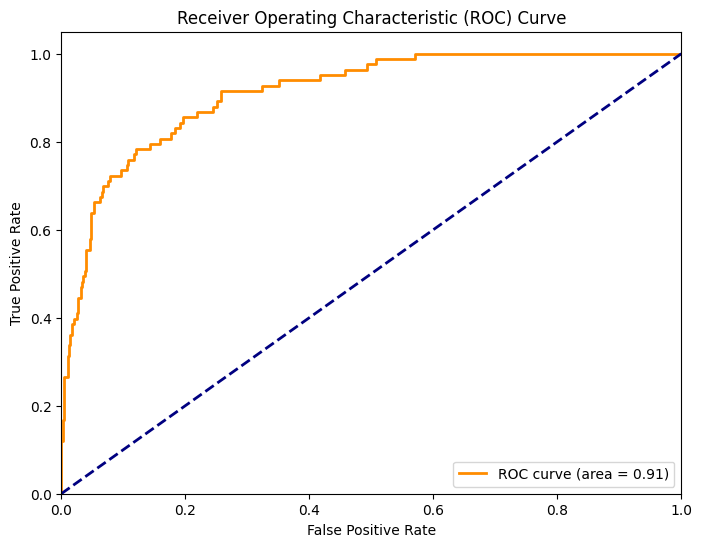

In [37]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

- Overall, the ROC curve and the AUC value of 0.91 indicate that the model has a high discriminative ability to differentiate between positive and negative classes, making it a robust classifier for the given task.

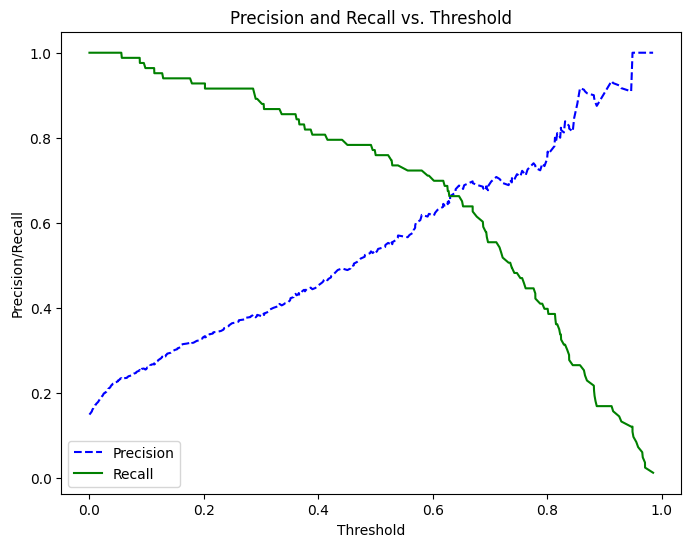

Optimal Threshold: 0.6460386619723266
Accuracy: 0.905
Precision: 0.688
Recall: 0.663
F1 Score: 0.675
AUC-ROC: 0.911


In [38]:
# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_test)

# Function to plot precision-recall curve and indicate threshold
def plot_precision_recall_vs_threshold(precision, recall, thresholds):
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, precision[:-1], "b--", label="Precision")
    plt.plot(thresholds, recall[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.ylabel("Precision/Recall")
    plt.title("Precision and Recall vs. Threshold")
    plt.legend(loc="best")
    plt.show()

# Plot precision and recall as a function of the threshold
plot_precision_recall_vs_threshold(precision, recall, thresholds)

# Find the threshold that maximizes the F1 score
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold = thresholds[np.argmax(f1_scores)]
print(f"Optimal Threshold: {optimal_threshold}")

# Apply the new threshold to make final predictions
y_pred_new_threshold = (y_pred_proba_test >= optimal_threshold).astype(int)

# Evaluate the model with the new threshold
accuracy = accuracy_score(y_test, y_pred_new_threshold)
precision_new = precision_score(y_test, y_pred_new_threshold)
recall_new = recall_score(y_test, y_pred_new_threshold)
f1_new = f1_score(y_test, y_pred_new_threshold)
auc_roc = roc_auc_score(y_test, y_pred_proba_test)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision_new:.3f}")
print(f"Recall: {recall_new:.3f}")
print(f"F1 Score: {f1_new:.3f}")
print(f"AUC-ROC: {auc_roc:.3f}")

- **Optimal Threshold:** The graph and metrics indicate that the optimal threshold for this model is approximately 0.646. This threshold balances precision and recall to achieve the best performance.
- **Precision:** The precision at the optimal threshold is 0.688. This indicates that when the model predicts a positive class, 68.8% of the time, it is correct.
- **Recall:** The recall at the optimal threshold is 0.663. This means that the model correctly identifies 66.3% of all actual positive instances.

Overall, this graph and the associated metrics demonstrate that the model performs well with a high level of accuracy, good precision, and recall, particularly at the identified optimal threshold. The AUC-ROC value further supports the model's effectiveness in distinguishing between the classes.

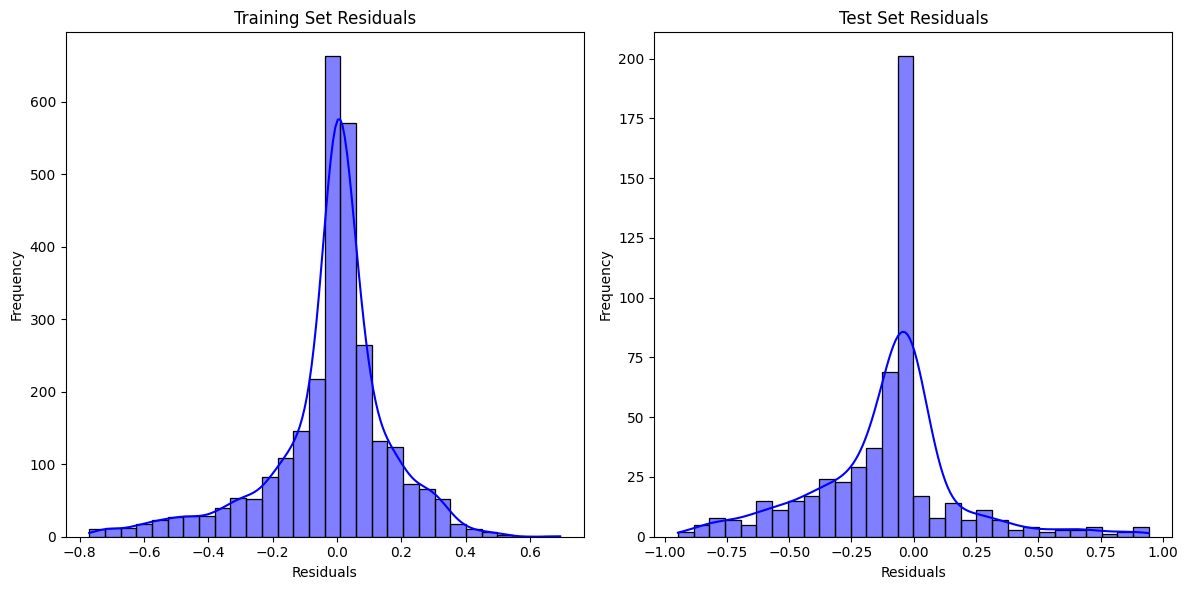

In [39]:
# Calculate residuals for both training and test sets
train_residuals = y_train - y_pred_proba_train
test_residuals = y_test - y_pred_proba_test

# Plot residuals
plt.figure(figsize=(12, 6))

# Training residuals
plt.subplot(1, 2, 1)
sns.histplot(train_residuals, kde=True, color='blue', bins=30)
plt.title('Training Set Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Test residuals
plt.subplot(1, 2, 2)
sns.histplot(test_residuals, kde=True, color='blue', bins=30)
plt.title('Test Set Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


- Both sets of residuals being centered around zero and approximately normally distributed is a good sign, indicating that the **model performs consistently on both training and test data.**
-  The residual analysis indicates that the model performs well with unbiased and normally distributed errors in both the training and test sets, with slightly more variance in the test set, which is expected in practical applications.